Partie 1 : Arbre de décision
1- Installer les bibliothèques

In [7]:
!pip install scikit-learn
!pip install graphviz 
!pip install pydotplus
!pip install six


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/52/2d/ad6928a578c78bb0e44e34a5a922818b14c56716b81d145924f1f291416f/scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.1/9.3 MB 653.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.3 MB 656.4 kB/s eta 0:00:14
   ---------------------------------------- 0.1/9.3 MB 656.4 kB/s eta 0:00:14
    --------------------------------------- 0.1/9.3 MB 450.6 kB/s eta 0:00:21
    --------------------------------------- 0.1/9.3 MB 450.6 kB/s eta 0:00:21
    --------------------------------------- 0.2/9.3 MB 655.6 kB/s eta 0:00:14
   - -------------------------------------- 0.3/9.3 MB 682.7 kB/s eta 0:00:14
   - -----------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mouna\\anaconda3\\envs\\Atelier_ML\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



2. Importer le jeu de données

In [11]:
from six import StringIO
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO  # Modify this line
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes_data = pd.read_csv("diabetes.csv", header=None, names=col_names)


3. Prétraitement des données

In [12]:
diabetes_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [15]:
duplicates = diabetes_data.duplicated().sum()
print(duplicates)

0


In [16]:
 diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [17]:
diabetes_data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,769,769,769,769,769,769,769,769,769
unique,18,137,48,52,187,249,518,53,3
top,1,100,70,0,0,32,0.254,22,0
freq,135,17,57,227,374,13,6,72,500


In [19]:
zeros_count = (diabetes_data[['skin', 'insulin','glucose','age','bmi','bp']] == 0).sum()
zeros_count

skin       0
insulin    0
glucose    0
age        0
bmi        0
bp         0
dtype: int64

In [31]:
import seaborn as sns
import pandas as pd

# Define a custom color
custom_color = "#ffcc00"  

# Create a color map
cm = sns.light_palette(custom_color, as_cmap=True)

# Create a DataFrame with information about the dataset
info = pd.DataFrame({
    "name": diabetes_data.columns,
    "non-nulls": len(diabetes_data) - diabetes_data.isnull().sum().values,
    "nulls": diabetes_data.isnull().sum().values,
    "type": diabetes_data.dtypes.values
})

# Apply the background gradient with the custom color
styled_info = info.style.background_gradient(cmap=cm)

# Display the styled DataFrame
styled_info


,name,non-nulls,nulls,type
0,pregnant,769,0,object
1,glucose,769,0,object
2,bp,769,0,object
3,skin,769,0,object
4,insulin,769,0,object
5,bmi,769,0,object
6,pedigree,769,0,object
7,age,769,0,object
8,label,769,0,object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    float64
 1   glucose   768 non-null    float64
 2   bp        768 non-null    float64
 3   skin      768 non-null    float64
 4   insulin   768 non-null    float64
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    float64
dtypes: float64(8)
memory usage: 48.2 KB
None


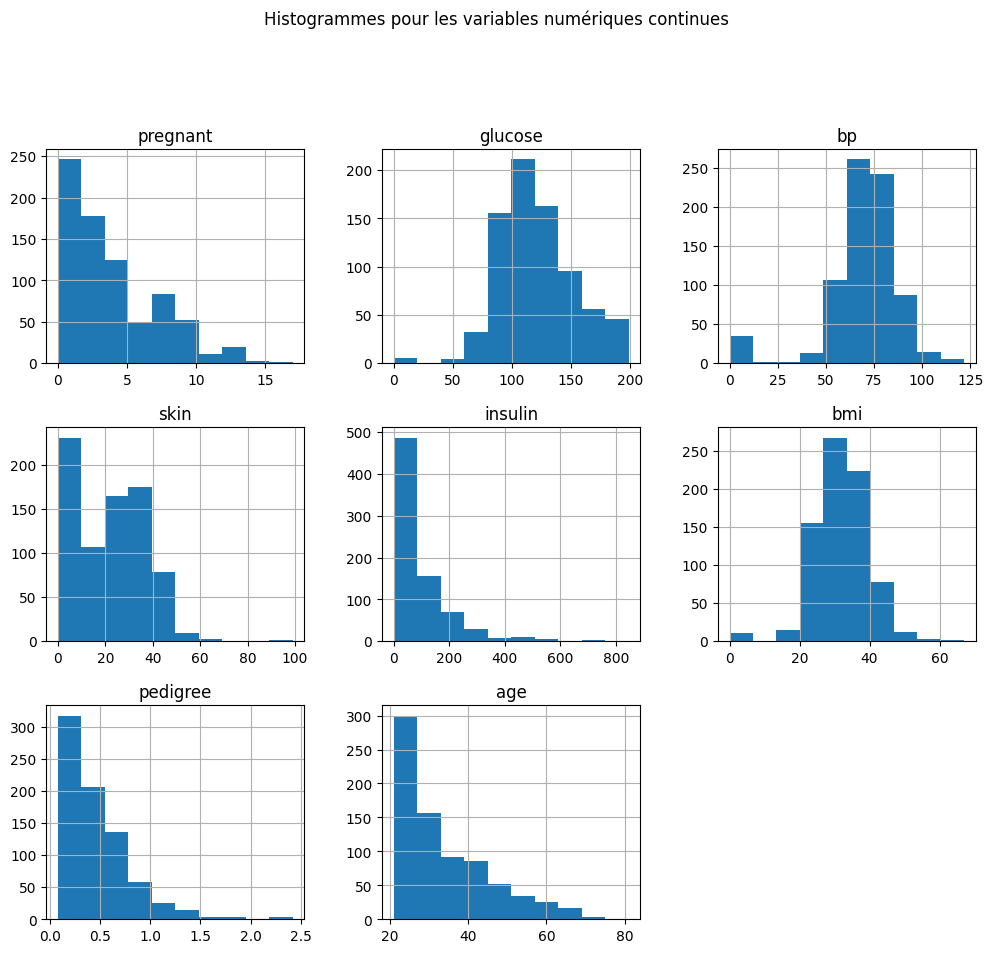

In [61]:
# Variables numériques continues
numeric_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree','age']
# Convertir les colonnes numériques en types numériques
diabetes_data[numeric_cols] = diabetes_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Vérifier les types de données après la conversion
print(diabetes_data[numeric_cols].info())

# Histogrammes pour les variables numériques continues
diabetes_data[numeric_cols].hist(figsize=(12, 10))
plt.suptitle('Histogrammes pour les variables numériques continues', y=1.02)
plt.show()

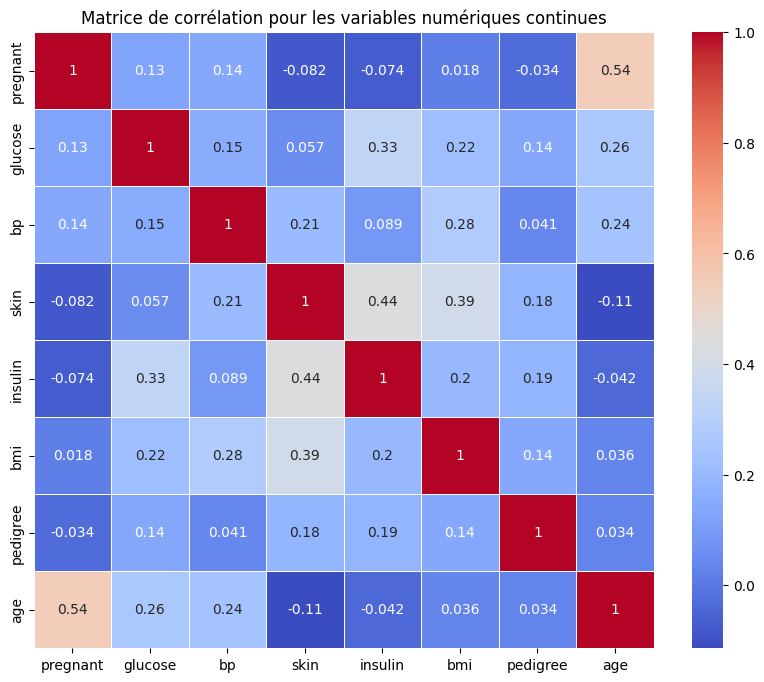

In [62]:

# Matrice de corrélation pour les variables numériques continues
corr_matrix = diabetes_data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de corrélation pour les variables numériques continues')
plt.show()


C:\Users\mouna\AppData\Local\Temp\ipykernel_21796\2455958250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=diabetes_data, palette='Set2')


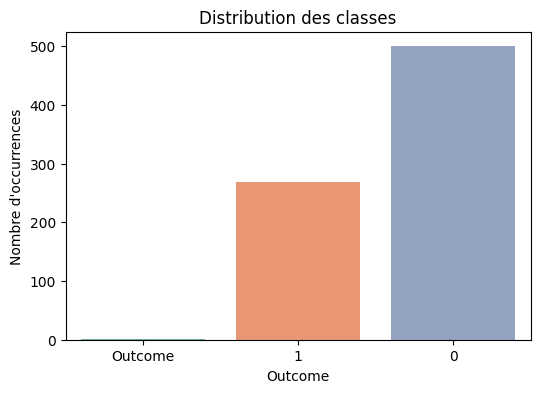

In [63]:
# Variable catégorielle (label)
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=diabetes_data, palette='Set2')
plt.title('Distribution des classes')
plt.xlabel('Outcome')
plt.ylabel('Nombre d\'occurrences')
plt.show()


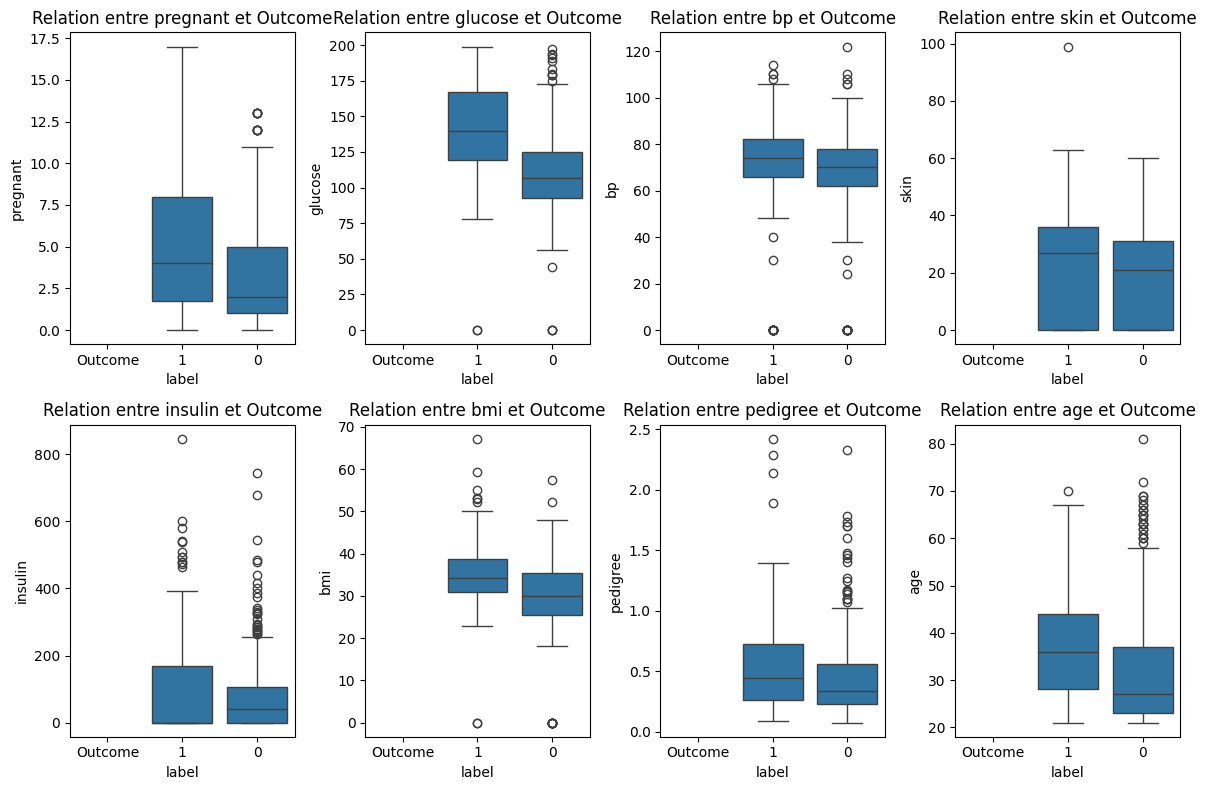

In [66]:
# Relation entre les variables continues et la variable cible
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='label', y=col, data=diabetes_data)
    plt.title(f'Relation entre {col} et Outcome')
plt.tight_layout()
plt.show()

